<a href="https://colab.research.google.com/github/Iryna-Lytvynchuk/Data_project/blob/main/CNN_2_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train/255
X_test = X_test/255

In [ ]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,AveragePooling2D,MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import BatchNormalization

In [ ]:
Input_shape = X_train.shape[1:]

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform', padding='same',input_shape = Input_shape))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform', padding='same',input_shape = Input_shape))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))


cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu', kernel_initializer='he_uniform'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=0.001,beta_1=0.9,beta_2=0.999), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
history = cnn_model.fit(X_train, y_train, batch_size = 64, epochs = 20, shuffle = True, validation_data=(X_test,y_test))

Epoch 1/20
782/782 [==============================] - 23s 26ms/step - loss: 1.7106 - accuracy: 0.4447 - val_loss: 1.1838 - val_accuracy: 0.5807
Epoch 2/20
782/782 [==============================] - 20s 25ms/step - loss: 1.1212 - accuracy: 0.6050 - val_loss: 0.9603 - val_accuracy: 0.6624
Epoch 3/20
782/782 [==============================] - 20s 25ms/step - loss: 0.9363 - accuracy: 0.6692 - val_loss: 0.9273 - val_accuracy: 0.6834
Epoch 4/20
782/782 [==============================] - 20s 25ms/step - loss: 0.8135 - accuracy: 0.7142 - val_loss: 0.7475 - val_accuracy: 0.7456
Epoch 5/20
782/782 [==============================] - 20s 25ms/step - loss: 0.7439 - accuracy: 0.7389 - val_loss: 0.7003 - val_accuracy: 0.7604
Epoch 6/20
782/782 [==============================] - 20s 25ms/step - loss: 0.6869 - accuracy: 0.7601 - val_loss: 0.6520 - val_accuracy: 0.7752
Epoch 7/20
782/782 [==============================] - 20s 25ms/step - loss: 0.6348 - accuracy: 0.7793 - val_loss: 0.6204 - val_accuracy:

In [ ]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 3s 9ms/step - loss: 0.4931 - accuracy: 0.8448
Test Accuracy: 0.8447999954223633


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip = True,
                            )
datagen.fit(X_train)

In [17]:
history = cnn_model.fit_generator(datagen.flow(X_train, y_train, batch_size = 64), epochs = 125, validation_data=(X_test,y_test))

Epoch 1/125
  1/782 [..............................] - ETA: 56s - loss: 0.5995 - accuracy: 0.8281

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


782/782 [==============================] - 46s 58ms/step - loss: 0.5042 - accuracy: 0.8253 - val_loss: 0.4503 - val_accuracy: 0.8432
Epoch 2/125
782/782 [==============================] - 46s 59ms/step - loss: 0.4935 - accuracy: 0.8275 - val_loss: 0.5206 - val_accuracy: 0.8258
Epoch 3/125
782/782 [==============================] - 46s 59ms/step - loss: 0.4823 - accuracy: 0.8320 - val_loss: 0.5587 - val_accuracy: 0.8157
Epoch 4/125
782/782 [==============================] - 46s 58ms/step - loss: 0.4811 - accuracy: 0.8339 - val_loss: 0.4106 - val_accuracy: 0.8591
Epoch 5/125
782/782 [==============================] - 45s 58ms/step - loss: 0.4699 - accuracy: 0.8368 - val_loss: 0.4786 - val_accuracy: 0.8389
Epoch 6/125
782/782 [==============================] - 45s 58ms/step - loss: 0.4619 - accuracy: 0.8397 - val_loss: 0.4649 - val_accuracy: 0.8429
Epoch 7/125
782/782 [==============================] - 46s 59ms/step - loss: 0.4545 - accuracy: 0.8413 - val_loss: 0.4673 - val_accuracy: 0.84

In [18]:
score = cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3506 - accuracy: 0.8917


In [19]:
score_test= cnn_model.evaluate(X_train, y_train)

1563/1563 [==============================] - 14s 9ms/step - loss: 0.1158 - accuracy: 0.9595


In [20]:
print('Train accuracy', score_test[1])

Train accuracy 0.9595199823379517


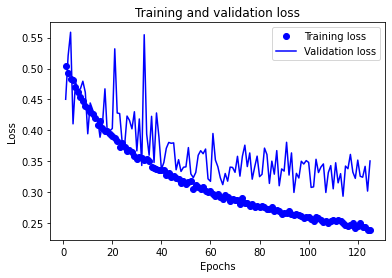

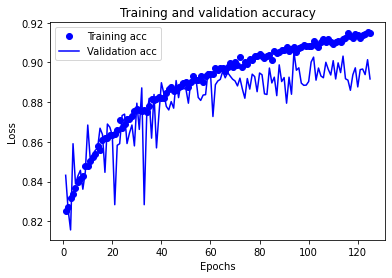

In [21]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

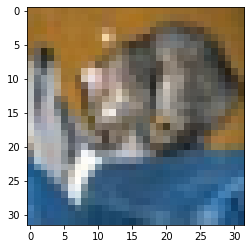

Ответ нейросети:  cat


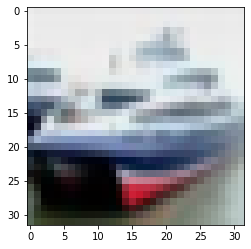

Ответ нейросети:  ship


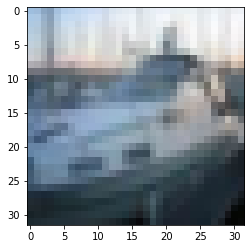

Ответ нейросети:  ship


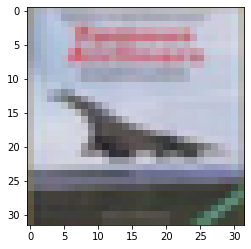

Ответ нейросети:  airplane


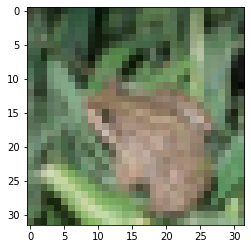

Ответ нейросети:  frog


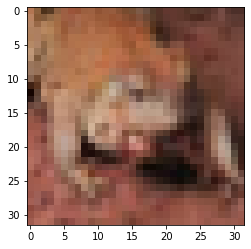

Ответ нейросети:  frog


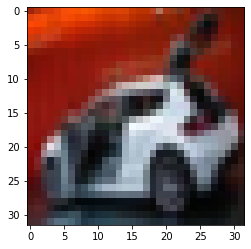

Ответ нейросети:  automobile


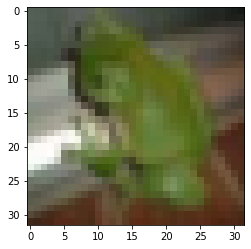

Ответ нейросети:  frog


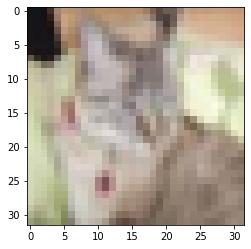

Ответ нейросети:  cat


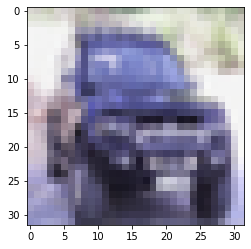

Ответ нейросети:  automobile


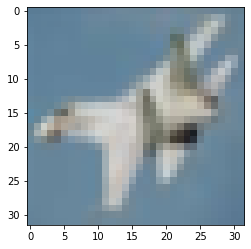

Ответ нейросети:  airplane


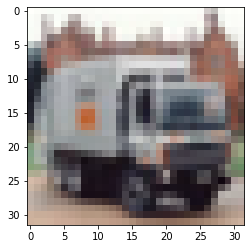

Ответ нейросети:  truck


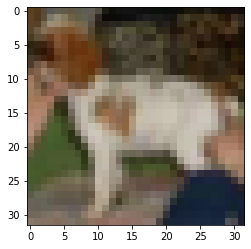

Ответ нейросети:  dog


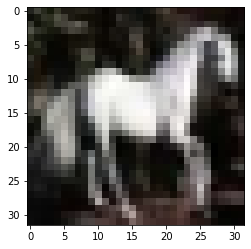

Ответ нейросети:  horse


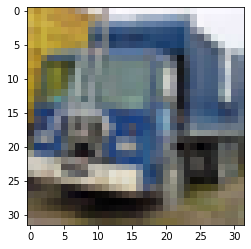

Ответ нейросети:  truck


In [22]:
predictions = cnn_model(X_test)

label_dictionnary = { 0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck" }

for i in range(15):
    plt.imshow(X_test[i])
    plt.show()
    print("Ответ нейросети: ", label_dictionnary[np.argmax(predictions.numpy()[i])])

In [23]:
import cv2

labels =["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

res_img = cv2.resize(X_test[7],(32,32))
res_img = np.expand_dims(res_img, axis = 0)

predictions = cnn_model.predict(res_img)
n = np.argmax(predictions)
print("Output label:", n)
print(labels[n])

Output label: 6
frog


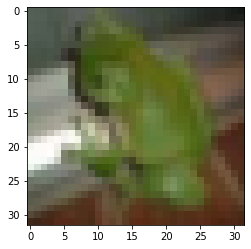

In [24]:
plt.imshow(X_test[7])
plt.show()

In [ ]:
cnn_model.save('CNN_2_CIFAR10.h5')

In [ ]:
from google.colab import files
files.download('CNN_2_CIFAR10.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>